# barc4sr: 
## Example 03 - Spectrum spatial distribution (undulator radiation) for an ideal and a tabulated undulator

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '25/03/2024'
__changed__ = '10/04/2024'

import sys

import barc4sr.undulator as und
import numpy as np
from barc4plots.barc4plots import BarcPlotManager
from barc4sr.processing import read_undulator_radiation, select_energy_range_undulator_radiation
from barc4sr.utils import ElectronBeam, MagneticStructure, write_syned_file

# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
%load_ext autoreload
%autoreload 2
%matplotlib widget

OASYS distribution of SRW
c:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


### Creation of SYNED input file (.json)

The SYNED Light Source file containing the electron beam parameters and the undulator parameters 
should be created using [OASYS](https://oasys-kit.github.io/). barc4sr provides a method 
for generating a simplified SYNED file, but the OASYS method remains preferred.

In order to generate the SYNED file, we create an ```ElectronBeam``` object and a ```MagneticStructure```
object and call the ```write_syned_file``` function from ```barc4sr.utils```


In [2]:
eBeam = ElectronBeam()

eBeam.from_twiss(energy=2.75, energy_spread=0.001025, current=0.500,
                 emittance=3.939e-9, coupling=1/100,
                 emittance_x=None, emittance_y=None,
                 beta_x=4.789, beta_y=3.7497, 
                 alpha_x=-0.3858, alpha_y=-0.7746,
                 eta_x=0.1804, eta_y=0.0044,
                 etap_x=0.0007, etap_y=-0.0025)

u64 = MagneticStructure(K_vertical=0.0,
                        K_horizontal=0.0,
                        period_length=64e-3,
                        number_of_periods=28.0)

u64.set_resonant_energy(50, 1, eBeam.energy_in_GeV, "v")

write_syned_file(".\light_sources\soleil_hu64.json", "SOLEIL-HU64", eBeam, u64)

## Ideal undulator

### Calculation of the **ideal 2D spectrum distribution** (undulator radiation) of an ideal planar undulator

This example show different ways or calling ```xoppy.undulator_radiation(*args, **kwargs)```: 

In [3]:
ei = 40    
ef = 60    
ne = int((ef-ei)/0.20) + 1

step = 20e-6
hor_slit=2.5e-3
hor_slit_n=int(hor_slit/step)+1
ver_slit=2.5e-3
ver_slit_n=int(ver_slit/step)+1

In [4]:
energy, intensity, h_axis, v_axis = und.undulator_radiation(
                                        file_name=".\example_03\SOLEIL-U64mm",
                                        json_file=".\light_sources\soleil_hu64.json",
                                        photon_energy_min=ei,
                                        photon_energy_max=ef,
                                        photon_energy_points=ne,
                                        hor_slit=hor_slit, 
                                        hor_slit_n=hor_slit_n,
                                        ver_slit=ver_slit,
                                        ver_slit_n=ver_slit_n,
                                        observation_point=20,
                                        Kv_symmetry=1,
                                        electron_trajectory=True,
                                        parallel=True)

eTraj_ideal = und.read_electron_trajectory(r".\example_03\SOLEIL-U64mm_eTraj.dat")
magField = np.asarray([eTraj_ideal["Z"], eTraj_ideal["Bx"], eTraj_ideal["By"], eTraj_ideal["Bz"]]).T
magField = und.generate_srw_magnetic_field(magField, r".\example_03\SOLEIL-U64mm_srw_magField.dat")

Undulator radiation spatial and spectral distribution using SRW. Please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... >>>.\example_03\SOLEIL-U64mm_eTraj.dat<<< completed
> Performing flux through finite aperture (simplified partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 1.56 s for 9 pts (E0 = 40.0 eV).
 Core 2: 1.48 s for 8 pts (E0 = 41.8 eV).
 Core 3: 1.60 s for 8 pts (E0 = 43.4 eV).
 Core 4: 1.60 s for 9 pts (E0 = 45.0 eV).
 Core 5: 1.28 s for 8 pts (E0 = 46.8 eV).
 Core 6: 1.07 s for 8 pts (E0 = 48.4 eV).
 Core 7: 1.01 s for 9 pts (E0 = 50.0 eV).
 Core 8: 1.30 s for 8 pts (E0 = 51.8 eV).
 Core 9: 1.41 s for 8 pts (E0 = 53.4 eV).
 Core 10: 1.57 s for 9 pts (E0 = 55.0 eV).
 Core 11: 1.55 s for 8 pts (E0 = 56.8 eV).
 Core 12: 1.48 s for 9 pts (E0 = 58.4 eV).
completed
Undulator radiation spatial and spectral distribution using SRW: finished
>> Total elapsed time: 3.

In [5]:
undulator_radiation = read_undulator_radiation([".\example_03\SOLEIL-U64mm_undulator_radiation.h5"])
undulator_radiation = select_energy_range_undulator_radiation(undulator_radiation, -1, -1, dx=2, dy=2)

.\example_03\SOLEIL-U64mm_undulator_radiation.h5
UR files loaded
Processing undulator radiation
> 101 sample images (125 x 125) found (0.01 Gb in memory)
Puissance totale reçue : 0.102 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written
Processing undulator radiation (parallel)
> 101 sample images (99 x 99) found (0.00 Gb in memory)
Puissance totale reçue : 0.065 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written


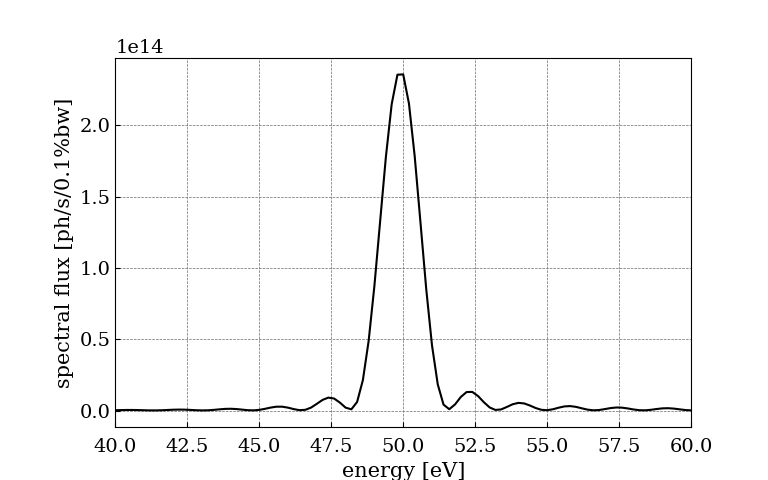

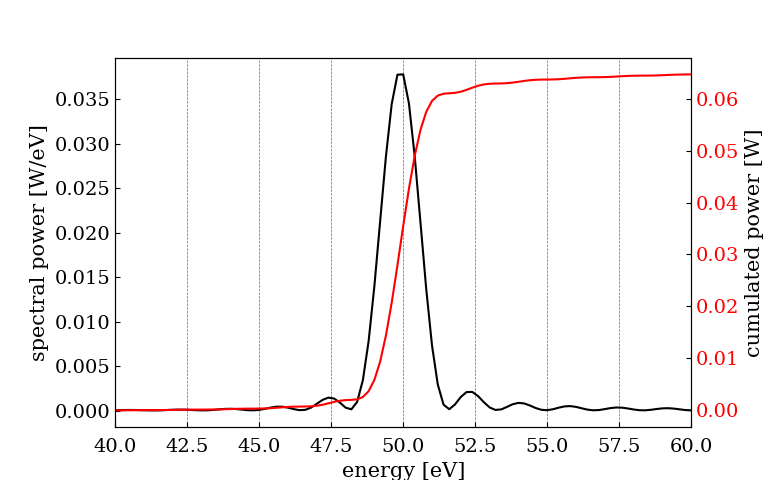

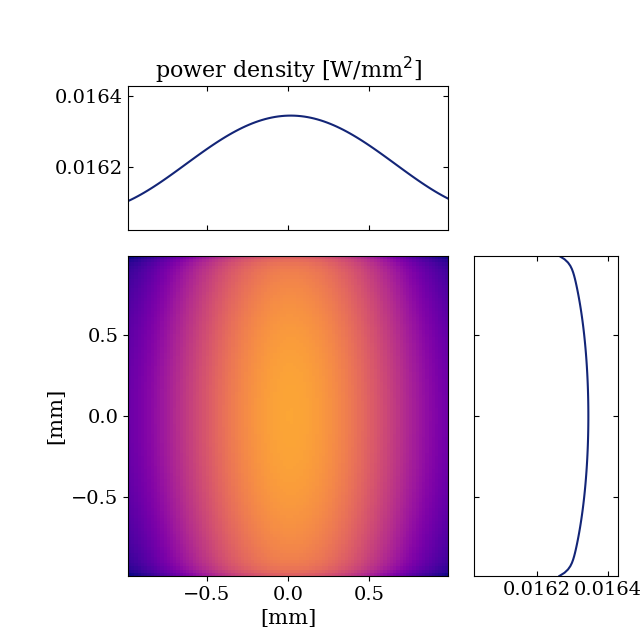

In [15]:
img = BarcPlotManager(undulator_radiation["spectrum"]["flux"],  undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")#, 30, 65000, 1e10, 3e15)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d()

img = BarcPlotManager(undulator_radiation["spectrum"]["spectral_power"], undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral power [W/eV]")#, 30, 65000, -.005, 0.145)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1)
img.info_1d_twin(undulator_radiation["spectrum"]["cumulated_power"], undulator_radiation["spectrum"]["energy"], "cumulated power [W]", None, None, 1, None, "-").plot_1d()

pmin = np.amin(undulator_radiation["power_density"]["map"])*1
pmax = np.amax(undulator_radiation["power_density"]["map"])*1.005
img = BarcPlotManager(undulator_radiation["power_density"]["map"], undulator_radiation["axis"]["x"], undulator_radiation["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=pmin, max=pmax)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()

In [16]:
energy, intensity, h_axis, v_axis = und.undulator_radiation(
                                        file_name=".\example_03\SOLEIL-U64mm_me",
                                        json_file=".\light_sources\soleil_hu64.json",
                                        photon_energy_min=ei,
                                        photon_energy_max=ef,
                                        photon_energy_points=ne,
                                        hor_slit=hor_slit, 
                                        hor_slit_n=hor_slit_n,
                                        ver_slit=ver_slit,
                                        ver_slit_n=ver_slit_n,
                                        observation_point=20,
                                        Kv_symmetry=1,
                                        number_macro_electrons=200,
                                        parallel=True)


Undulator radiation spatial and spectral distribution using SRW. Please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (accurate partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 681.06 s for 9 pts (E0 = 40.0 eV).
 Core 2: 624.51 s for 8 pts (E0 = 41.8 eV).
 Core 3: 601.63 s for 8 pts (E0 = 43.4 eV).
 Core 4: 507.03 s for 9 pts (E0 = 45.0 eV).
 Core 5: 373.72 s for 8 pts (E0 = 46.8 eV).
 Core 6: 383.05 s for 8 pts (E0 = 48.4 eV).
 Core 7: 407.04 s for 9 pts (E0 = 50.0 eV).
 Core 8: 420.08 s for 8 pts (E0 = 51.8 eV).
 Core 9: 572.35 s for 8 pts (E0 = 53.4 eV).
 Core 10: 691.28 s for 9 pts (E0 = 55.0 eV).
 Core 11: 631.75 s for 8 pts (E0 = 56.8 eV).
 Core 12: 685.63 s for 9 pts (E0 = 58.4 eV).
completed
Undulator radiation spatial and spectral distribution using SRW: finished
>> Total elapsed time: 11 min 32.73 s


.\example_03\SOLEIL-U64mm_me_undulator_radiation.h5
UR files loaded
Processing undulator radiation
> 101 sample images (125 x 125) found (0.01 Gb in memory)
Puissance totale reçue : 0.102 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written
Processing undulator radiation (parallel)
> 101 sample images (99 x 99) found (0.00 Gb in memory)
Puissance totale reçue : 0.064 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written


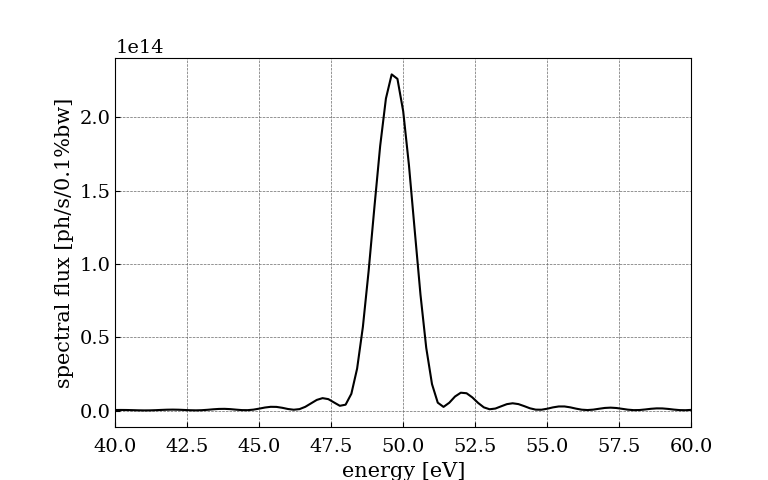

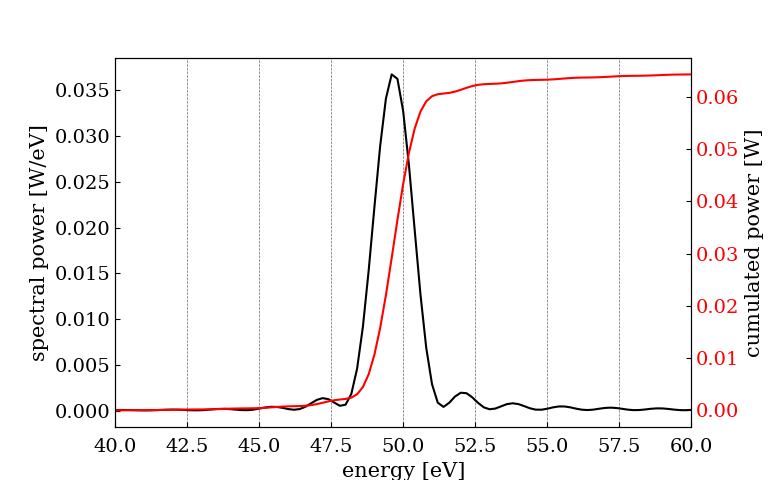

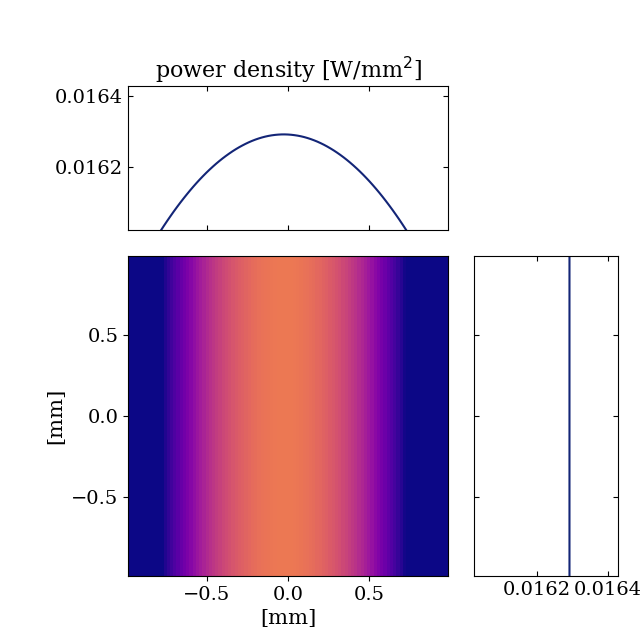

In [17]:
undulator_radiation = read_undulator_radiation([".\example_03\SOLEIL-U64mm_me_undulator_radiation.h5"])
undulator_radiation = select_energy_range_undulator_radiation(undulator_radiation, -1, -1, dx=2, dy=2)

img = BarcPlotManager(undulator_radiation["spectrum"]["flux"],  undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")#, 30, 65000, 1e10, 3e15)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d()

img = BarcPlotManager(undulator_radiation["spectrum"]["spectral_power"], undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral power [W/eV]")#, 30, 65000, -.005, 0.145)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1)
img.info_1d_twin(undulator_radiation["spectrum"]["cumulated_power"], undulator_radiation["spectrum"]["energy"], "cumulated power [W]", None, None, 1, None, "-").plot_1d()

img = BarcPlotManager(undulator_radiation["power_density"]["map"], undulator_radiation["axis"]["x"], undulator_radiation["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=pmin, max=pmax)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()